# Iris analysis

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

**Description of the dataset**

The dataset under analysis contains information about the Iris plant. Specifically, it includes morphological measurements of the flowers—such as petal and sepal length and width—for three distinct species of Iris: Iris setosa, Iris versicolor, and Iris virginica.

In [15]:
df_iris = pd.read_csv('data/Iris.csv')

In [16]:
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
df_iris.shape

(150, 6)

The dataset consists of 150 records, each representing a flower sample from the Iris species. Each record is characterized by 5 features, detailed as follows:

- **SepalLengthCm** and **SepalWidthCm**: these indicate the length and width of the sepal, which are leaf-like structures located beneath the petals. Sepals play a protective role during the budding phase and help shield the flower from external threats, such as insect attacks.
- **PetalLengthCm** and **PetalWidthCm**: these represent the length and width of the petal—the colorful part of the flower responsible for attracting pollinators.
- **Species**: specifies the species to which each flower belongs. The dataset includes data from three Iris species: **Setosa**, **Versicolor**, **Virginica**.

<img src="images/Setosa.jpg" width="300"/>
<img src="images/Versicolor.jpg" width="300"/>
<img src="images/Virginica.jpg" width="300"/>

In [18]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [19]:
df_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Data Exploration

We will remove the Id column, as it merely serves as a unique identifier for the records—an aspect already implicitly handled by the system—and does not contribute any meaningful information for exploratory or predictive analysis.

In [20]:
df_iris.drop('Id', axis=1, inplace=True)

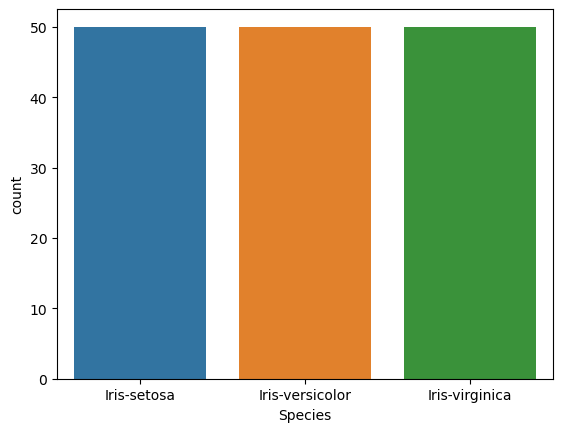

In [68]:
sns.countplot(df_iris, x='Species')
plt.show()

We begin by noting that the three Iris species in the dataset are equally distributed, with 50 records for each species. This balanced distribution is advantageous for both analysis and classification tasks, as it avoids the issue of class imbalance, which could otherwise negatively impact model performance by biasing predictions toward the majority class.

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

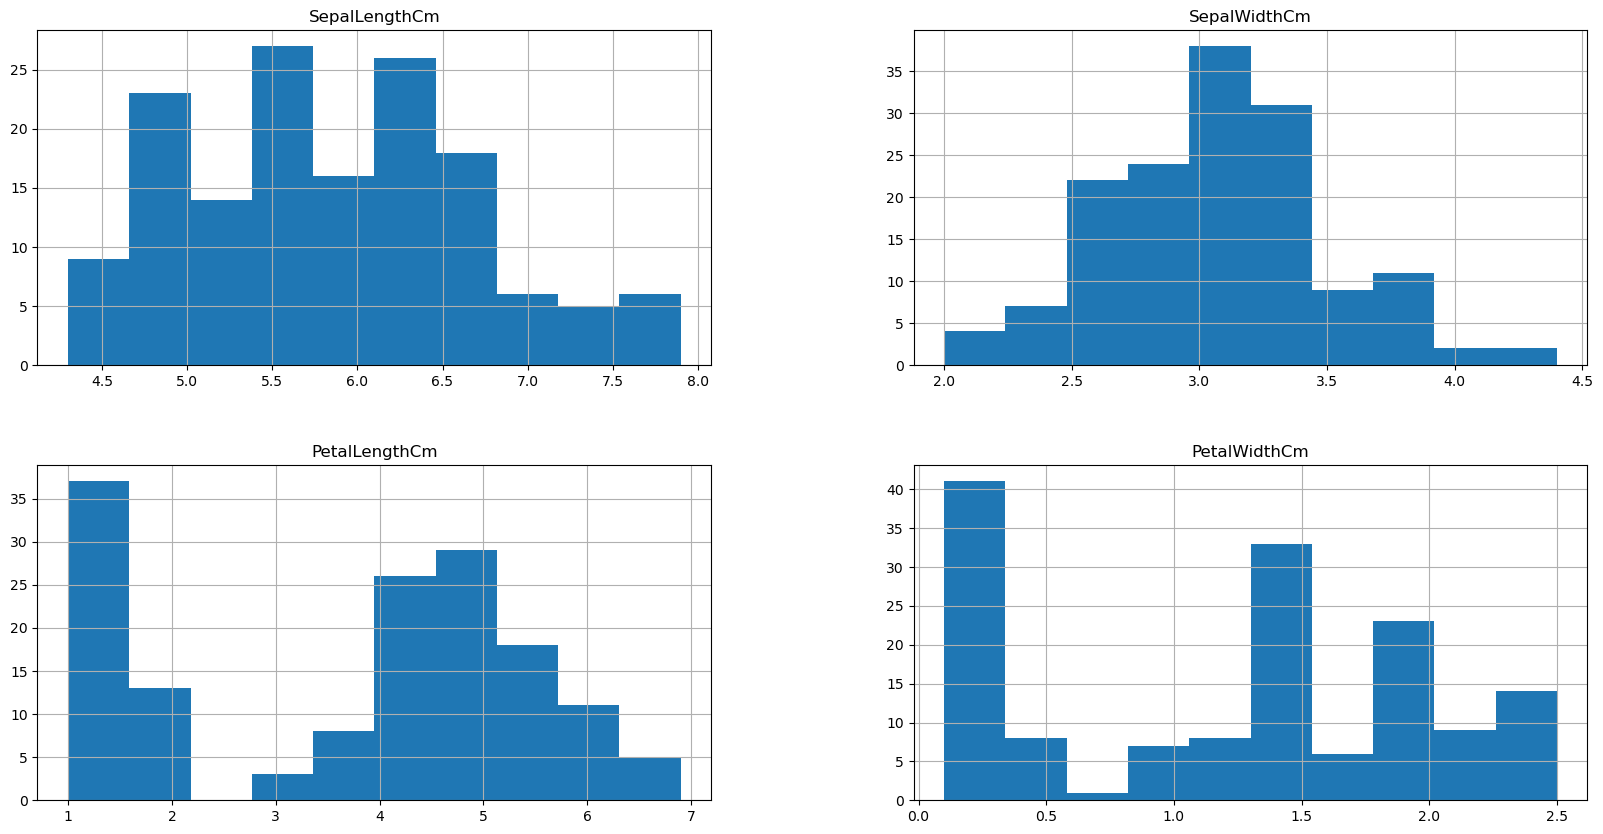

In [62]:
df_iris.hist(figsize=(20, 10))

When analyzing the distributions of the petal-related features (PetalLengthCm and PetalWidthCm), an unusual pattern emerges: both exhibit a bimodal distribution, appearing to be split into two distinct groups.

Let's now visualize the distribution of each numerical feature in the dataset, broken down by the three Iris species (Setosa, Versicolor, and Virginica). This will allow us to observe how morphological characteristics vary across species and help assess the separability of the data.

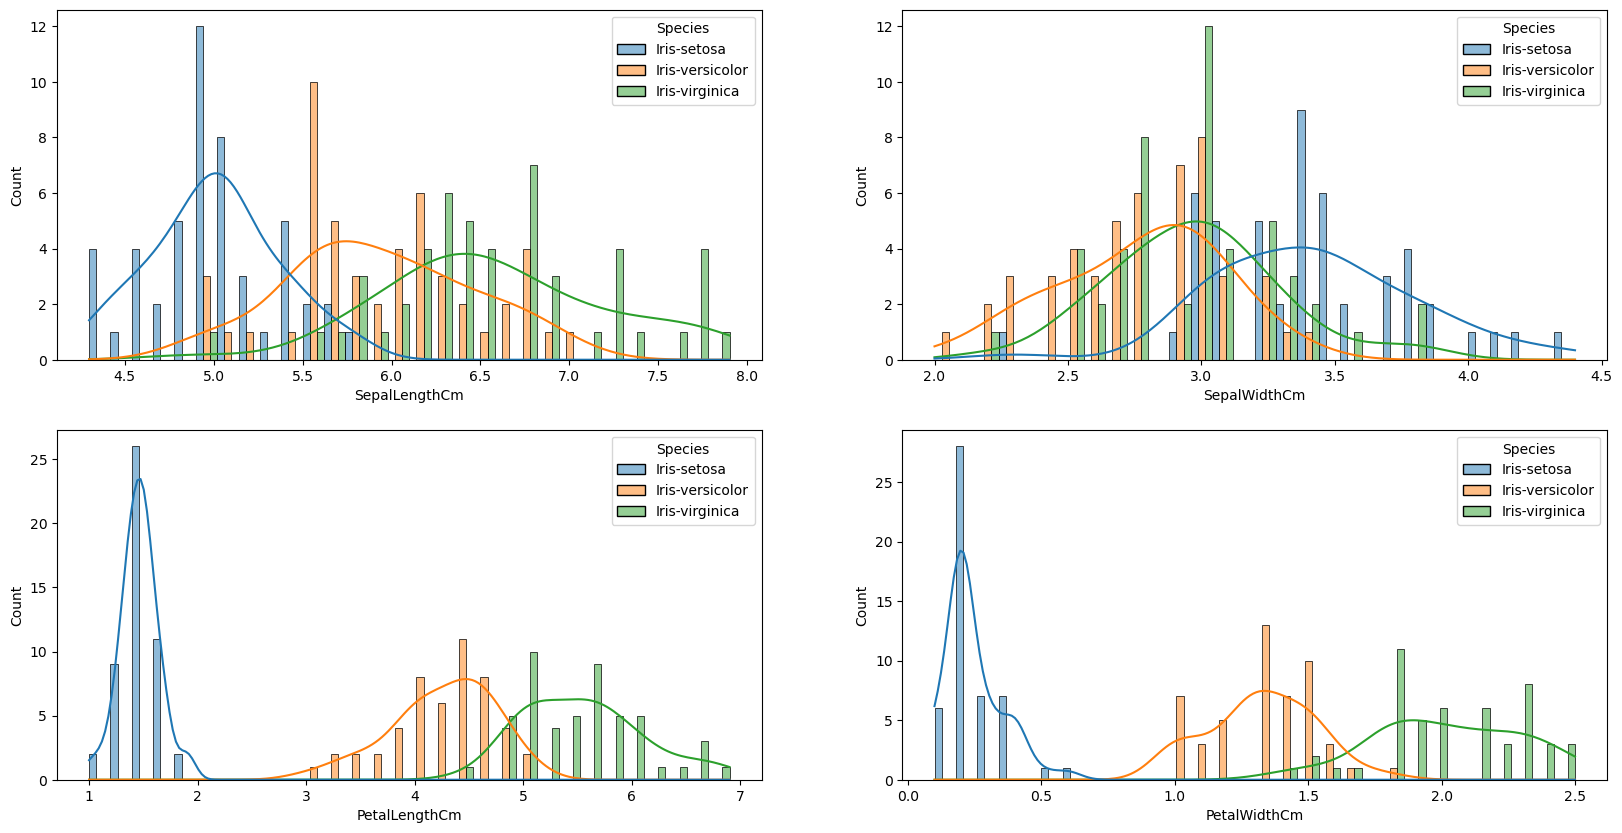

In [65]:
cols = 2
rows = len(df_iris.columns.delete(-1)) // cols

fig, ax = plt.subplots(rows, cols, figsize=(20, 10))
ax = ax.flatten()

for i, feature in enumerate(df_iris.columns.delete(-1)):
	sns.histplot(df_iris, x=feature, hue='Species', multiple='dodge', ax=ax[i], bins=30, kde=True)

plt.show()

As we can see, the anomalies initially observed in the distributions of the petal features were actually due to morphological differences between species. Specifically, Iris Setosa stands out for its significantly smaller petal size, with lengths and widths generally ranging from 1 to 2 cm.

Setosa also shows a distinct pattern in sepal length, with an average around 5 cm, which is typically shorter than that of the other two species.
Regarding sepal width, the values appear to be more homogeneous across species, and the distinction is less pronounced compared to petal size or sepal length.

We will now perform an analysis of the correlations between the various features in the dataset. We will compute the correlation matrix to identify linear relationships between variables.

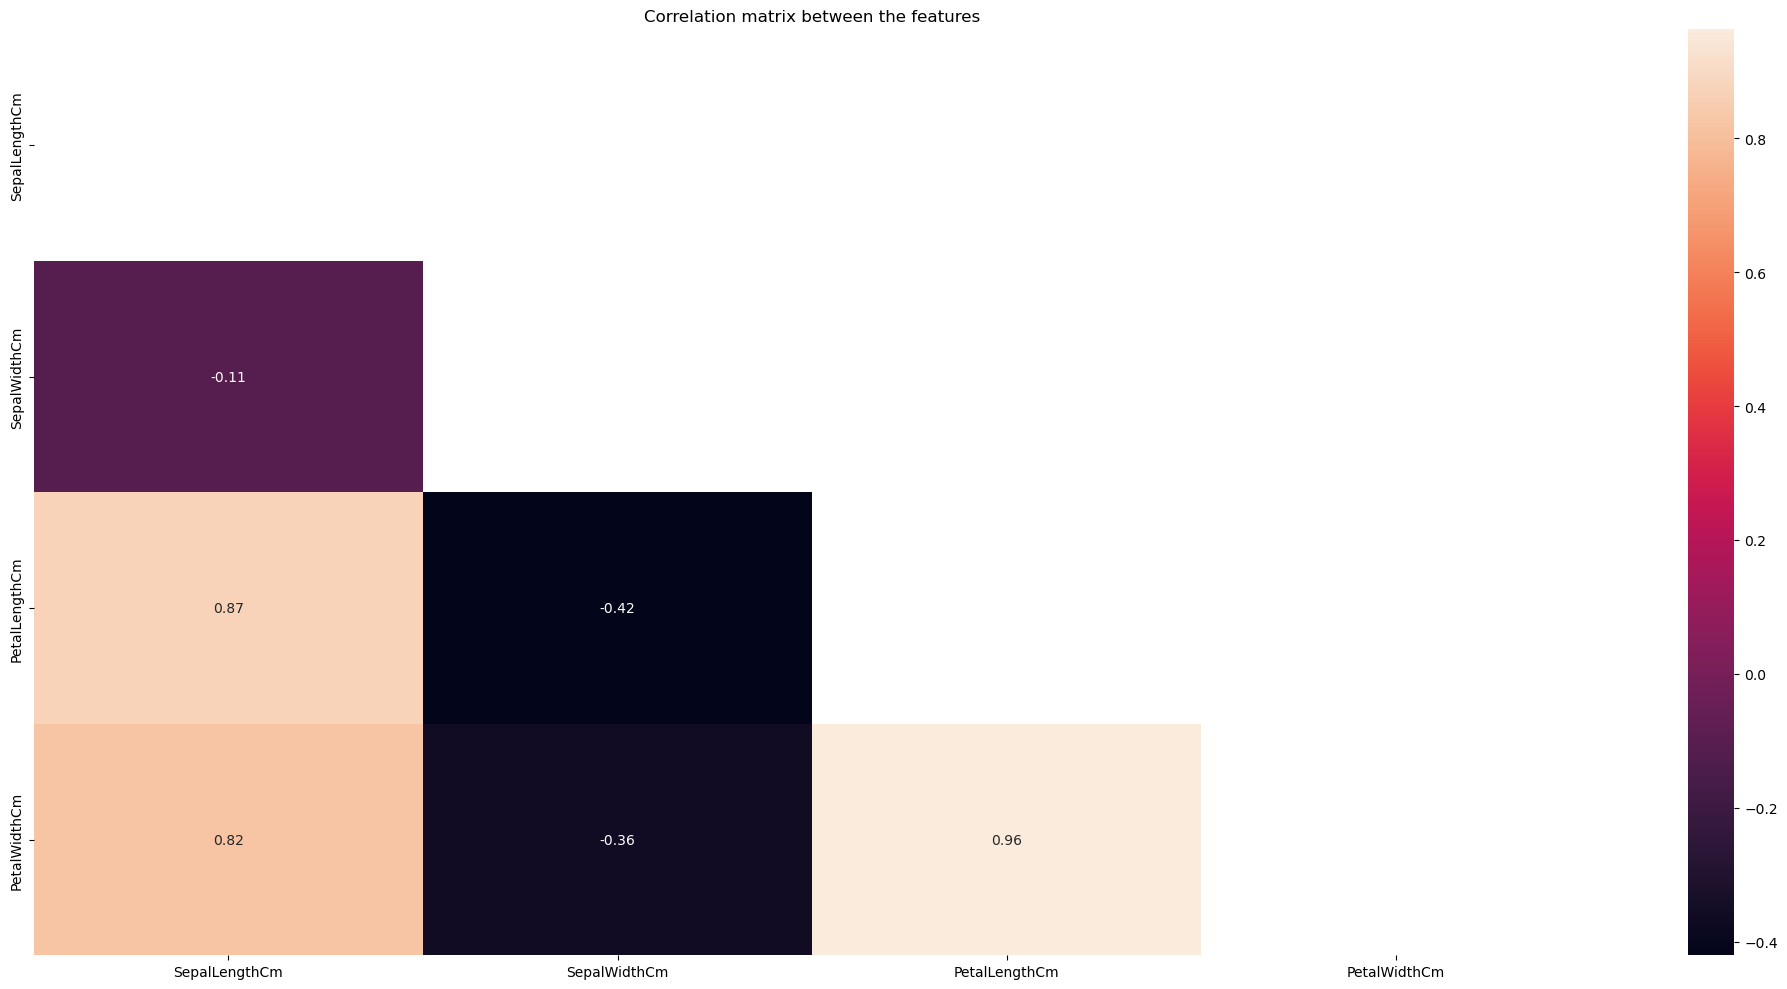

In [69]:
correlation_matrix = df_iris.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=np.bool_))

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, mask=mask, annot=True)
plt.title('Correlation matrix between the features')
plt.tight_layout()
plt.show()

From the correlation matrix analysis, several significant relationships among the dataset's features emerge:

- Sepal length (SepalLengthCm) shows a moderate positive correlation with both petal length (PetalLengthCm) and petal width (PetalWidthCm), indicating a degree of consistency in overall flower size.
- As expected, there is a very strong positive correlation between petal length and petal width.
- Interestingly, sepal width (SepalWidthCm) appears to have virtually no correlation with petal length.

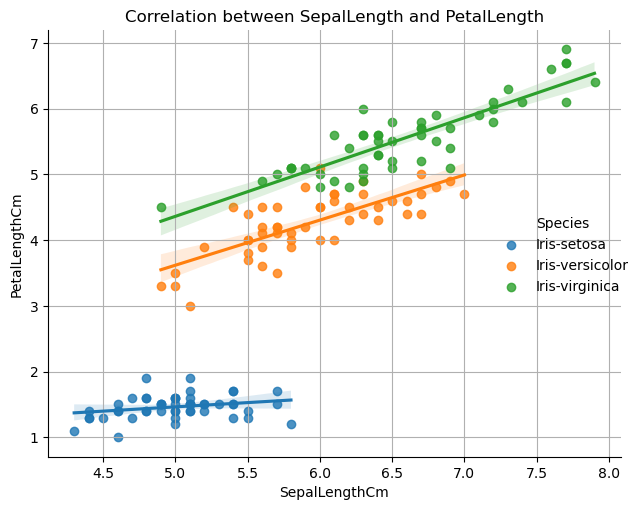

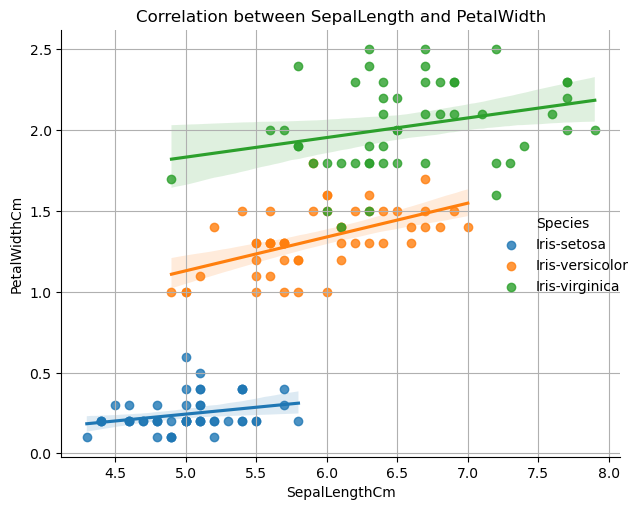

In [81]:
sns.lmplot(df_iris, x='SepalLengthCm', y='PetalLengthCm', hue='Species')
plt.tight_layout()
plt.grid(True)
plt.title('Correlation between SepalLength and PetalLength')
plt.show()

sns.lmplot(df_iris, x='SepalLengthCm', y='PetalWidthCm', hue='Species')
plt.tight_layout()
plt.grid(True)
plt.title('Correlation between SepalLength and PetalWidth')
plt.show()

As expected, in both cases the analyzed features exhibit a clear direct proportional relationship: as one variable increases, so does the other.

The same considerations apply to the relationship between petal width and petal length.

<Figure size 1000x500 with 0 Axes>

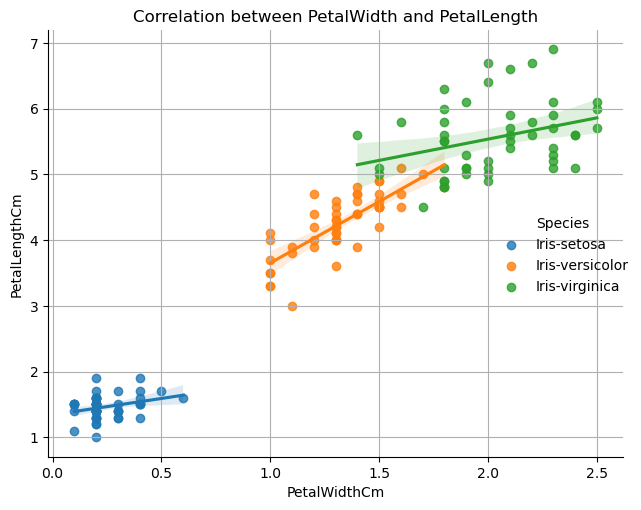

In [84]:
plt.figure(figsize=(10, 5))
sns.lmplot(df_iris, x='PetalWidthCm', y='PetalLengthCm', hue='Species')
plt.tight_layout()
plt.title('Correlation between PetalWidth and PetalLength')
plt.grid(True)
plt.show()

A particularly interesting insight from the correlation analysis is the very weak relationship between sepal width (SepalWidthCm) and petal length (PetalLengthCm). This pattern is especially evident in the Setosa species, where the data points on the scatter plot appear to align along an almost horizontal line, indicating no meaningful variation between the two variables.

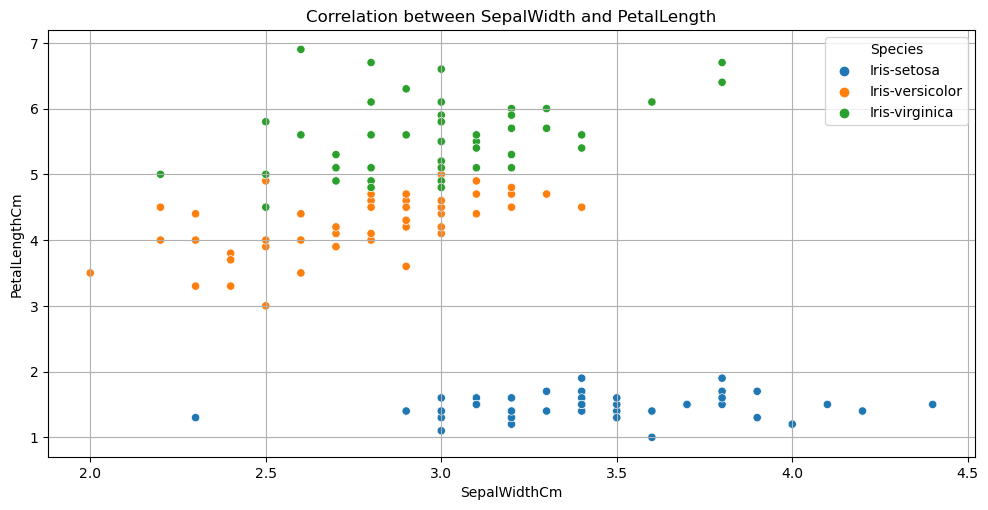

In [85]:
plt.figure(figsize=(10, 5))
sns.scatterplot(df_iris, x='SepalWidthCm', y='PetalLengthCm', hue='Species')
plt.tight_layout()
plt.grid(True)
plt.title('Correlation between SepalWidth and PetalLength')
plt.show()

Let us try to examine all possible comparisons between the features in general.

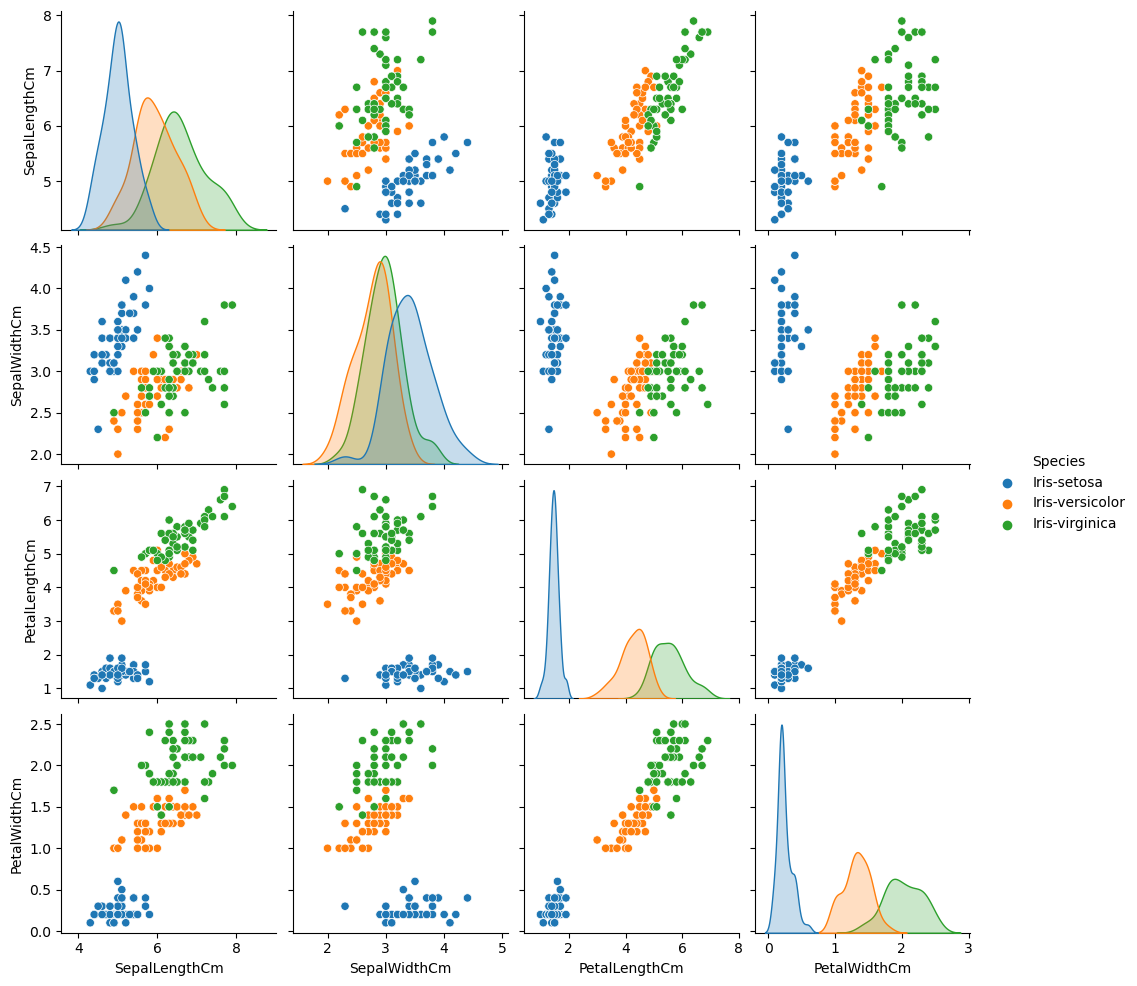

In [86]:
sns.pairplot(df_iris, hue='Species')

We can observe that the Setosa species is the one with the fewest correlations between the features.